# Peptidase analysis

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.1

In [111]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [75]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Merops annotation

In [77]:
vir_orfs = pd.read_csv("../../3_Annotation/Merops/merops_counts.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
vir_orfs["Merops orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs.head()

ID,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0095620,MER0034615,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0036115,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0030244,MER0002968,MER0281397,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0001289,MER0005764,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0004914,MER0001266,MER0013957,MER0033259,MER0013471,MER0027368,MER0066182,MER0001123,MER0033274,MER0001513,MER0002007,MER0017069,MER0013541,MER0038688,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0017367,MER0003336,MER0000443,MER0011900,MER0003537,MER0036027,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0100667,MER0036114,MER0002565,MER0492485,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0034659,MER0031563,MER0001236,MER0000472,MER0015462,MER0015691,MER0018254,MER0002601,MER0028284,MER0023251,MER0004146,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0011256,MER0004954,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0017239,MER0019092,MER0018473,MER0003327,MER0011345,MER0036053,MER0003448,MER0001233,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0209507,MER0183709,MER0035032,MER0003817,MER0005778,MER0428540,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0167712,MER0017193,MER0011583,MER0033176,MER0000576,MER0030136,MER0013479,MER0003543,MER0015166,MER0219770,MER0056022,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0017009,MER0006198,MER0011666,MER0015415,MER0200437,MER0001709,MER0000315,MER0210990,MER0000459,MER0003802,MER0002060,MER0000319,MER0011806,MER0002459,MER0050859,MER0214982,MER0002299,MER0034665,MER0031433,MER0025512,MER0058228,MER0014137,MER0015468,MER0181656,MER0003798,MER0005742,MER0000266,MER0004953,MER0080749,MER0001285,MER0031611,MER0002038,MER0000329,MER0030246,MER0019280,MER0003065,MER0001185,MER0002355,MER0003629,MER0031616,MER0043146,MER0040529,MER0003303,MER0036044,MER0004959,MER0002635,MER0005331,MER0004857,MER001547

In [78]:
merops = vir_orfs[["index", "Merops orfs total"]]
merops.head()

ID,index,Merops orfs total
0,GCA_900186545.1,102
1,GCA_900312745.1,244
2,GCA_006716485.1,198
3,GCA_009799805.1,99
4,GCA_900610345.1,101


### Merge with other tables:

In [79]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family"]]
metadata.head(2)

,Assembly accession,Genus,Family
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae


In [80]:
df = pd.merge(merops, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df.head(2)

,index,Merops orfs total,Assembly accession,Genus,Family
2506,GCA_900186545.1,102,GCA_900186545.1,Flavobacterium,Flavobacteriaceae
2548,GCA_900312745.1,244,GCA_900312745.1,Aquimarina,Flavobacteriaceae


In [81]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192


In [82]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgcs= bgcs.set_index("index").T
bgcs["Nr_BGCs"] = bgcs.sum(axis=1)
bgcs.head()

index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7


In [102]:
merge = pd.merge(statistics[["Unnamed: 0","cazymes","Orfs_anno_cazymes%","orfs"]], merops, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")
merge = pd.merge(bgcs["Nr_BGCs"], merge, how="left", left_index=True, right_on="index")

merge["P"] = merge["Merops orfs total"]/(merge["cazymes"]+merge["Merops orfs total"])*2
merge=merge.sort_values(by="P")
merge.tail()

,Nr_BGCs,Unnamed: 0,cazymes,Orfs_anno_cazymes%,orfs,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family,P
985,7,GCA_013373485.1,32,1.088806,2939,GCA_013373485.1,133,4.525349,GCA_013373485.1,Tenacibaculum,Flavobacteriaceae,1.612121
645,1,GCA_004214015.1,10,1.280410,781,GCA_004214015.1,42,5.377721,GCA_004214015.1,MED-G11,Flavobacteriaceae,1.615385
2455,7,GCA_002700005.1,33,1.036432,3184,GCA_002700005.1,139,4.365578,GCA_002700005.1,Tenacibaculum,Flavobacteriaceae,1.616279
315,5,GCA_003852675.1,33,1.074569,3071,GCA_003852675.1,140,4.558776,GCA_003852675.1,Tenacibaculum,Flavobacteriaceae,1.618497
2110,1,GCA_003484565.1,14,0.848999,1649,GCA_003484565.1,62,3.759854,GCA_003484565.1,Kaistella,Weeksellaceae,1.631579


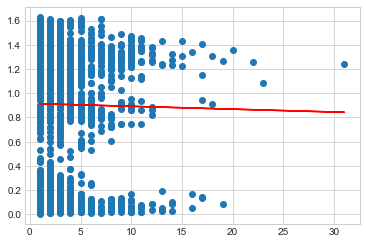

In [109]:
X = merge["Nr_BGCs"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [107]:
merge2= merge.copy()
merge2= merge2.groupby("Genus").mean()
merge2.head()

,Nr_BGCs,cazymes,Orfs_anno_cazymes%,orfs,Merops orfs total,Orfs_anno_merops%,P
Genus,,,,,,,
AU392,2.000000,53.000000,1.744574,3038.000000,92.500000,3.039818,0.794890
Aequorivita,2.952381,53.309524,1.796647,2958.714286,73.047619,2.427991,0.909100
Algibacter,1.777778,178.888889,4.441777,4080.777778,94.888889,2.382086,0.641269
Algibacter_A,1.000000,194.000000,5.806645,3341.000000,107.000000,3.202634,0.710963
Algibacter_B,1.200000,168.000000,4.933799,3359.200000,100.600000,3.011220,0.767071


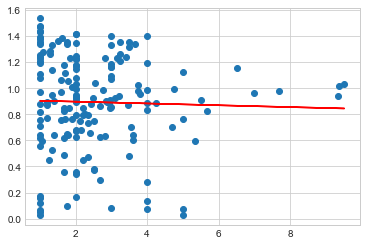

In [116]:
X = merge2["Nr_BGCs"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

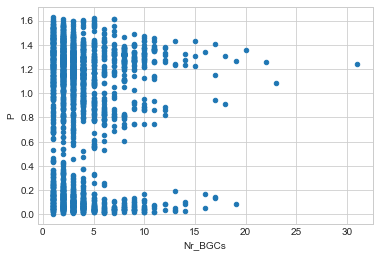

In [117]:
ax2 = merge.plot.scatter(x='Nr_BGCs',
                      y='P')

<AxesSubplot:>

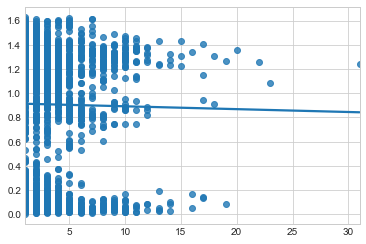

In [112]:
import seaborn as sns

#create scatterplot with regression line
sns.regplot(X, Y, ci=None)